<a href="https://colab.research.google.com/github/vamsis21/oyo_projects/blob/master/cifar10improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Improving Convolutional Network Performance on CIFAR 10


In this short project, I create a relatively simply convolutional neural network to classify the CIFAR10 dataset of images. Without batch normalization and data augmentation, we see that the accuracy of the network after 50 epochs hovers around 83%. However, after we apply these techniques to the trained network, we can squeeze out an extra 5%, pushing the accuracy up to 80%. I want to figure out an architecture that can reliably predict >90% on CIFAR10 or a similar dataset of images for my next project.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
plt.style.use('seaborn')

In [ ]:
# Getting CIFAR10 data
cifar10 = tf.keras.datasets.cifar10
(train_x,train_y),(val_x,val_y) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
# Preprocessing
train_x,val_x = train_x/255,val_x/255
train_y,val_y = train_y.flatten(),val_y.flatten()

In [ ]:
k = len(set(train_y))
print('Number of classes = ',k)

Number of classes =  10


In [ ]:
# Build model
i = Input(shape=train_x[0].shape)

x = Conv2D(32,(3,3),padding='same',activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(128,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024,activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(k,activation='softmax')(x)

model = Model(i,x)

In [ ]:
# Compile
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train withot data augmentation
model_results = model.fit(train_x,train_y,
                          validation_data = (val_x,val_y),
                          epochs=50)

Epoch 1/50
1563/1563 [==============================] - 26s 17ms/step - loss: 1.2953 - accuracy: 0.5549 - val_loss: 1.1412 - val_accuracy: 0.6115
Epoch 2/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8471 - accuracy: 0.7068 - val_loss: 0.7660 - val_accuracy: 0.7406
Epoch 3/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6956 - accuracy: 0.7621 - val_loss: 0.9254 - val_accuracy: 0.7046
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.5841 - accuracy: 0.8001 - val_loss: 0.6915 - val_accuracy: 0.7749
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4996 - accuracy: 0.8282 - val_loss: 0.6124 - val_accuracy: 0.8056
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.4201 - accuracy: 0.8546 - val_loss: 0.6562 - val_accuracy: 0.8005
Epoch 7/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.3687 - accuracy: 0.8726 - val_loss: 1.0323 -

Text(0.5, 1.0, 'loss vs epoch')

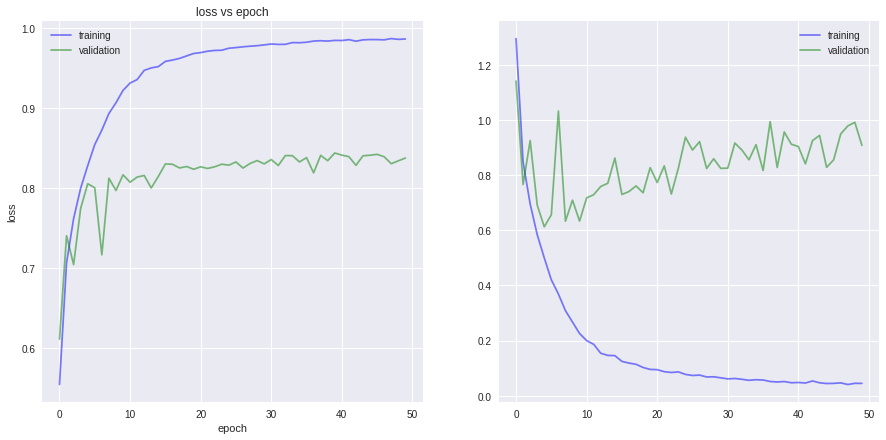

In [ ]:
fig = plt.figure(figsize=(15,7))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(model_results.history['accuracy'],color='blue',alpha=0.5,label='training')
ax1.plot(model_results.history['val_accuracy'],color='green',alpha=0.5,label='validation')
ax1.legend()
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('accuracy vs epoch')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(model_results.history['loss'],color='blue',alpha=0.5,label='training')
ax2.plot(model_results.history['val_loss'],color='green',alpha=0.5,label='validation')
ax2.legend()
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.set_title('loss vs epoch')

In [ ]:
# Continue training model, but with data augmentation
batch_size = 16
data_generator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator = data_generator.flow(train_x,train_y,batch_size)
StepsPerEpoch = train_x.shape[0]//batch_size
augmented_model_history = model.fit_generator(train_generator,
                                              validation_data = (val_x,val_y),
                                              steps_per_epoch = StepsPerEpoch,
                                              epochs=50)

Epoch 1/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.4164 - accuracy: 0.8633 - val_loss: 0.4799 - val_accuracy: 0.8461
Epoch 2/50
3125/3125 [==============================] - 53s 17ms/step - loss: 0.3881 - accuracy: 0.8725 - val_loss: 0.4652 - val_accuracy: 0.8482
Epoch 3/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.3734 - accuracy: 0.8746 - val_loss: 0.4493 - val_accuracy: 0.8568
Epoch 4/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.3686 - accuracy: 0.8783 - val_loss: 0.4450 - val_accuracy: 0.8583
Epoch 5/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.3556 - accuracy: 0.8821 - val_loss: 0.4785 - val_accuracy: 0.8567
Epoch 6/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.3492 - accuracy: 0.8847 - val_loss: 0.4438 - val_accuracy: 0.8591
Epoch 7/50
3125/3125 [==============================] - 52s 17ms/step - loss: 0.3337 - accuracy: 0.8894 - val_loss: 0.4329 -

Text(0.5, 1.0, 'loss v epoch for augmented model')

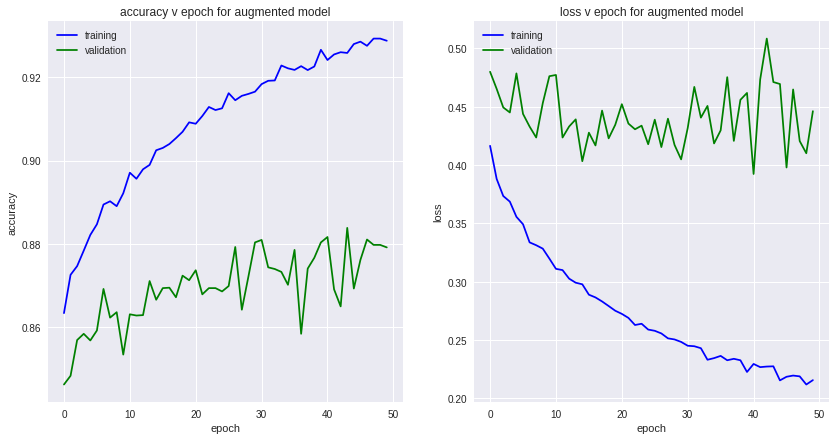

In [ ]:
fig2 = plt.figure(figsize=(14,7))

ax21 = fig2.add_subplot(1,2,1)
ax21.plot(augmented_model_history.history['accuracy'],color='blue',label='training')
ax21.plot(augmented_model_history.history['val_accuracy'],color='green',label='validation')
ax21.legend()
ax21.set_xlabel('epoch')
ax21.set_ylabel('accuracy')
ax21.set_title('accuracy v epoch for augmented model')

ax22 = fig2.add_subplot(1,2,2)
ax22.plot(augmented_model_history.history['loss'],color='blue',label='training')
ax22.plot(augmented_model_history.history['val_loss'],color='green',label='validation')
ax22.legend()
ax22.set_xlabel('epoch')
ax22.set_ylabel('loss')
ax22.set_title('loss v epoch for augmented model')